# Sample notebook illustrating how to plot an image with annotations.

This notebook assumes that you have downloaded `file1001064.h5` from the [fastMRI](https://fastmri.org) dataset and placed it in folder `../data`.

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import ImageDraw, Image
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

fastmri_path = '../data/'
fastmri_file = 'file1001064'
annotation_path = '../Annotations/knee.csv'

In [6]:
# Labels for this file
df = pd.read_csv(annotation_path, index_col=None, header=0)
labels_for_file = df.loc[df['file'] == fastmri_file]
labels_for_file['label'].unique()

array(['Meniscus Tear'], dtype=object)

In [7]:
datafile = os.path.join(fastmri_path, fastmri_file + '.h5')
f = h5py.File(datafile,'r')
img_data = f['reconstruction_rss'][:]
img_data = img_data[:, ::-1, :]  # flipped up down

In [8]:
def plot_bounding_box(image, labels):
    plotted_image = ImageDraw.Draw(image)
    for label in labels:
        _, _, _, x0, y0, w, h, label_txt = label
        x1 = x0 + w
        y1 = y0 + h
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline="white")
        plotted_image.text((x0, y0 - 10), label_txt, fill= "white")
    return np.array(image)

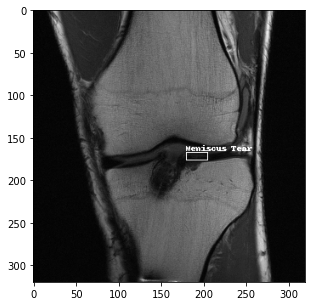

In [9]:
# Display an imageslice with annotations

slice_choice = 16
labels_for_slice = labels_for_file.loc[labels_for_file['slice'] == slice_choice].values.tolist()
arrimg = np.squeeze(img_data[slice_choice,:,:])
image_2d_scaled = (np.maximum(arrimg,0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
annotated_img = plot_bounding_box(image_2d_scaled, labels_for_slice)
plt.figure(figsize = (5,5))
plt.imshow(annotated_img,'gray')
plt.show()
